# Bank Customer's Churn Classification with Deep Learning
## Classifying bank customers based on their previous bank activities, that they will exit/leave the bank or not.
![shutterstock_1149929006.jpg?fit=1300%2C1036&ssl=1](https://i2.wp.com/fsocietysj.com/wp-content/uploads/2019/08/shutterstock_1149929006.jpg?fit=1300%2C1036&ssl=1)
## Dataset - large sample of the bank's customers.
### To make this dataset, the bank gathered information such as customer id, credit score, gender, age, tenure, balance, if the customer is active, has a credit card, etc. During a period of 6 months, the bank observed if these customers left or stayed in the bank.

## Aim 
### Goal is to make an Artificial Neural Network that can predict, based on geo-demographical and transactional information given above, if any individual customer will leave the bank or stay (customer churn). Also, rank all the customers of the bank, based on their probability of leaving.


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the dataset

In [2]:
df = pd.read_csv("../input/churn-modelling/Churn_Modelling.csv")

# EDA

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
# Importing essential libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

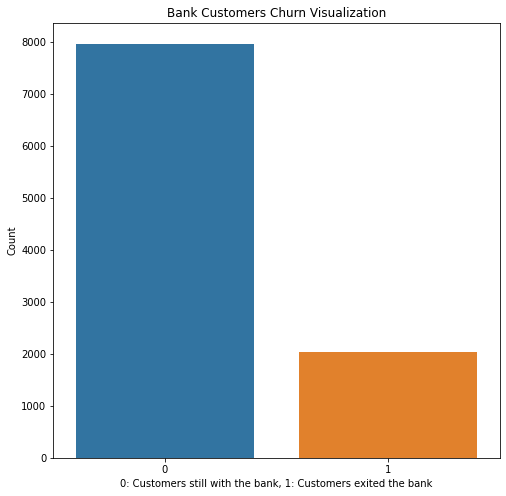

In [9]:
# Visualizing the count of 'exited customers' in the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [10]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [11]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Feature Engineering

### Converting categorical features into numerical features using get_dummies()

In [12]:
# Converting 'Geography' and 'Gender' column
geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [13]:
# Appending columns to original dataframe
df = pd.concat([df, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [14]:
df.drop(['Geography', 'Gender'], axis=1, inplace=True)

# Data Preprocessing

## • Split the dataset into independent features (ie: X) and label (ie: y).

## • Split the dataset further into train and test sets.

## • Apply feature scaling to train and test sets of independent features.

In [15]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [16]:
# Splitting the dataset into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 11), X_test size: (2000, 11)


In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building Artificial Neural Network (ANN)
### Artificial neural networks are one of the main tools used in machine learning. As the “neural” part of their name suggests, they are brain-inspired systems which are intended to replicate the way that we humans learn. Neural networks consist of input and output layers, as well as (in most cases) a hidden layer consisting of units that transform the input into something that the output layer can use. ANNs have three layers that are interconnected. The first layer consists of input neurons. Those neurons send data on to the second layer, which in turn sends the output neurons to the third layer. ANNs are considered non-linear statistical data modeling tools where the complex relationships between inputs and outputs are modeled or patterns are found.

![genes-10-00553-g001.png](https://www.mdpi.com/genes/genes-10-00553/article_deploy/html/images/genes-10-00553-g001.png)

# How does ANN work?
### It is truly said that the working of ANN takes its roots from the neural network residing in human brain. ANN operates on something referred to as Hidden State. These hidden states are similar to neurons. Each of these hidden state is a transient form which has a probabilistic behavior. A grid of such hidden state act as a bridge between the input and the output.
### We have an input layer which is the data we provide to the ANN. We have the hidden layers, which is where the magic happens. Lastly, we have the output layer, which is where the finished computations of the network are placed for us to use.
![1*f0hA2R652htmc1EaDrgG8g.png](http://cdn-images-1.medium.com/max/600/1*f0hA2R652htmc1EaDrgG8g.png)

### Initially the weights of the network can be randomly. When the input in given to the input layer the process moves forward and the hidden layer receives the input combined with the weights. This process goes on till the final layer of output is reached and result is given. When the result is out it is compared to the actual value and a back propagation algorithm comes into play to adjust the weights of the network linkages to better the result. What do the neurons in the layers then do? They are responsible for the learning individually. They consist of activation function that allows the signal to pass or not depending on which activation function is being used and what input came from the previous layer. We'll see activation functions in detail now.
![flowchart-ANN.png](http://www.analyticsvidhya.com/blog/wp-content/uploads/2014/10/flowchart-ANN.png)

In [18]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [19]:
# Initialising the ANN
classifier = Sequential()

In [20]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [21]:
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [22]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [23]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, batch_size=10, validation_split=0.33, epochs=100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.6762 - accuracy: 0.6366 - val_loss: 0.5307 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5012 - accuracy: 0.8069 - val_loss: 0.4904 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4822 - accuracy: 0.7902 - val_loss: 0.4682 - val_accuracy: 0.7963
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4405 - accuracy: 0.8026 - val_loss: 0.4562 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4323 - accuracy: 0.8021 - val_loss: 0.4444 - val_accuracy: 0.7982
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4277 - accuracy: 0.7975 - val_loss: 0.4330 - val_accuracy: 0.8016
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4071 - accuracy: 0.8072 - val_loss: 0.4227 - val_accuracy: 0.8027

In [25]:
# List all data in history
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

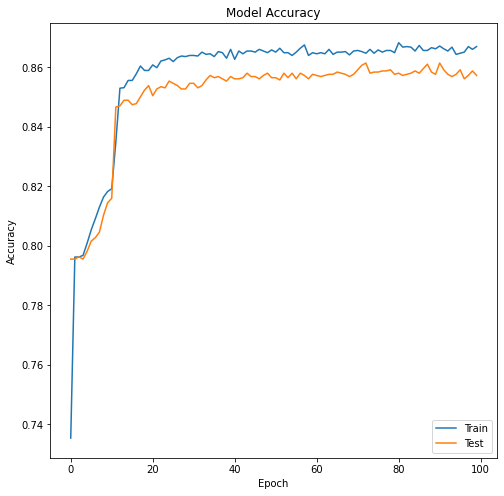

In [26]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

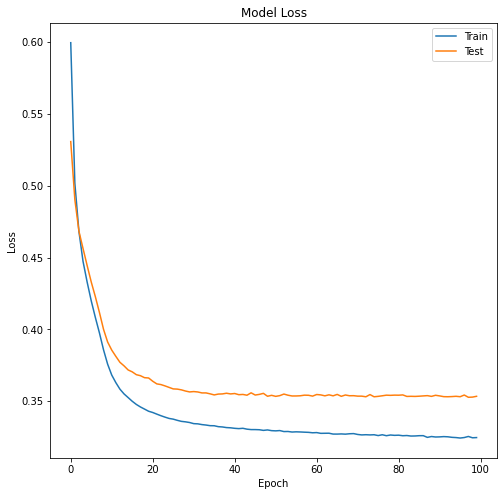

In [27]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Model Evaluation

In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [29]:
y_pred

array([[0.2850494 ],
       [0.21390451],
       [0.15805604],
       ...,
       [0.19214408],
       [0.15829296],
       [0.24301583]], dtype=float32)

In [30]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

## Confusion Matrix

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1502,   93],
       [ 187,  218]])

### Total correct predictions that customers stay in bank = 1502

### Total correct predictions that customers leave the bank = 218

### Total incorrect predictions that customers stay in the bank = 187

### Total incorrect predictions that customers leave in the bank = 93

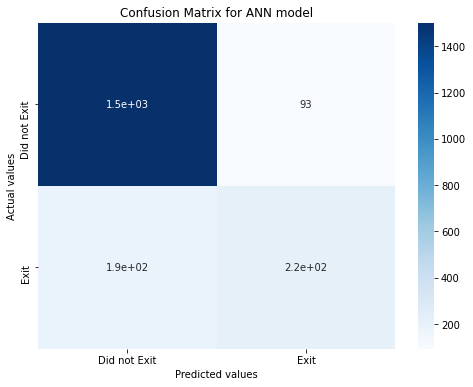

In [32]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

# Accuracy

In [33]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 86.0%


### Results - 86% Accuracy achieved.

# Predictions

In [34]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = sc.transform(sample_value)

  return classifier.predict(sample_value)

In [35]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

Prediction: Low change of exit.


In [36]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

Prediction: High change of exit!
